In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Define parameters
D = 0.001 # Diffusion coefficient in mm^2/day
r = 0.05   # Reaction rate in 1/day
n_max = 1.0  # Maximum value of n
sigma = 2.0  # Standard deviation in mm

# Spatial and temporal parameters
L = 31.0  # Spatial domain size in mm
T = 100.0  # Temporal domain size in days
Nx = 31 # Number of spatial grid points in x
Ny = 31 # Number of spatial grid points in y
Nz = 31 # Number of spatial grid points in z
Nt = 1500  # Number of time steps

dx = L / (Nx - 1)
dy = L / (Ny - 1)
dz = L / (Nz - 1)
dt = T / Nt

# Create a grid of spatial and temporal points in 3D
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
z = np.linspace(0, L, Nz)
t = np.linspace(0, T, Nt)

# Initialize n using the given initial condition in 3D
A = 1.0
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
n0 = A * np.exp(-(xx - L/2)**2 / (2 * sigma**2) - (yy - L/2)**2 / (2 * sigma**2) - (zz - L/2)**2 / (2 * sigma**2))

# Define a function to update n based on the PDE using finite differences in 3D
# a 3D kernel or filter that represents the discrete Laplacian operator
def update_n(n, dx, dy, dz, dt, D, r, n_max):
    laplacian_n = (convolve(n, np.array([[[0, 1, 0], [1, -6, 1], [0, 1, 0]], [[1, 1, 1], [1, -6, 1], [1, 1, 1]], [[0, 1, 0], [1, -6, 1], [0, 1, 0]]], dtype=float), mode='constant', cval=0))
    dn = D * laplacian_n + r * n * (1 - n / n_max)
    n_new = n + dt * dn
    return n_new

# Store n at each time step in 3D
n_values = [n0.copy()]

##Solution of the PDE ∂n/∂t = ∇²n D+ rn(1 - n/n_max)
# Time-stepping loop
n = n0.copy()
for _ in range(Nt):
    n = update_n(n, dx, dy, dz, dt, D, r, n_max)
    n_values.append(n.copy())

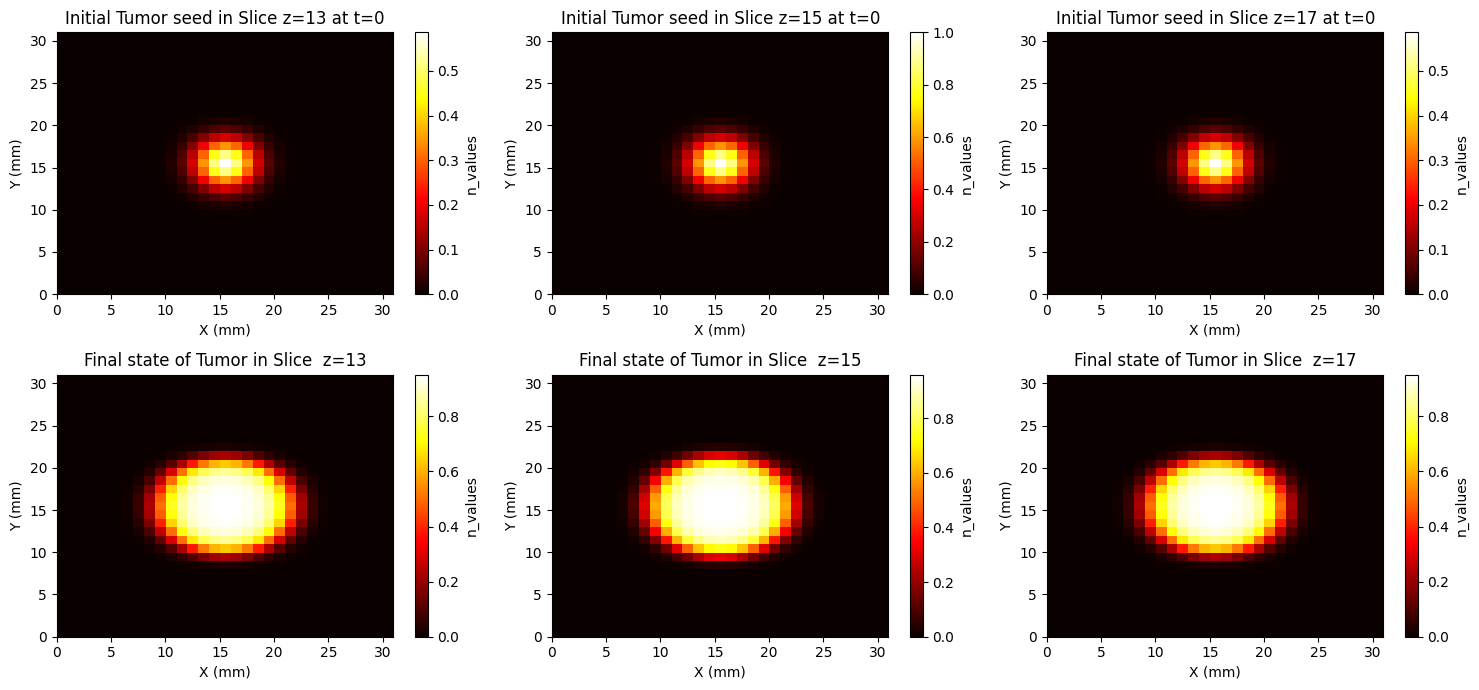

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Choose specific z-slices to display
z_slices = [13, 15, 17]

# Plot selected z-slices for the initial and final n_values
fig, axes = plt.subplots(2, len(z_slices), figsize=(15, 7))

for i, z in enumerate(z_slices):
    # Plot initial slice
    im1 = axes[0, i].imshow(n_values[0][:, :, z], extent=[0, L, 0, L], origin='lower', aspect='auto', cmap='hot')
    axes[0, i].set_title(f'Initial Tumor seed in Slice z={z} at t=0')
    axes[0, i].set_xlabel('X (mm)')
    axes[0, i].set_ylabel('Y (mm)')

    # Add color bar for initial slice
    cbar1 = plt.colorbar(im1, ax=axes[0, i])
    cbar1.set_label('n_values')

    # Plot final slice
    im2 = axes[1, i].imshow(n_values[1500][:, :, z], extent=[0, L, 0, L], origin='lower', aspect='auto', cmap='hot')
    axes[1, i].set_title(f'Final state of Tumor in Slice  z={z}')
    axes[1, i].set_xlabel('X (mm)')
    axes[1, i].set_ylabel('Y (mm)')

    # Add color bar for final slice
    cbar2 = plt.colorbar(im2, ax=axes[1, i])
    cbar2.set_label('n_values')

plt.tight_layout()
plt.show()